### Project :- Iris Flower Classification ###

### Task :- Iris flower has three species; setosa, versicolor, and virginica, which differs according to their ###
### measurements. Now assume that you have the measurements of the iris flowers according to 
### their species, and here your task is to train a machine learning model that can learn from the
### measurements of the iris species and classify them. ###

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/majid/Downloads/archive (1)/Iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

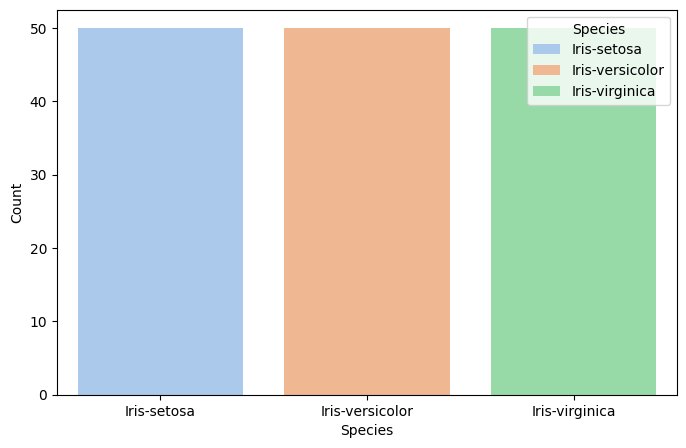

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x="Species",hue="Species",data=df,palette="pastel",legend=True)
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

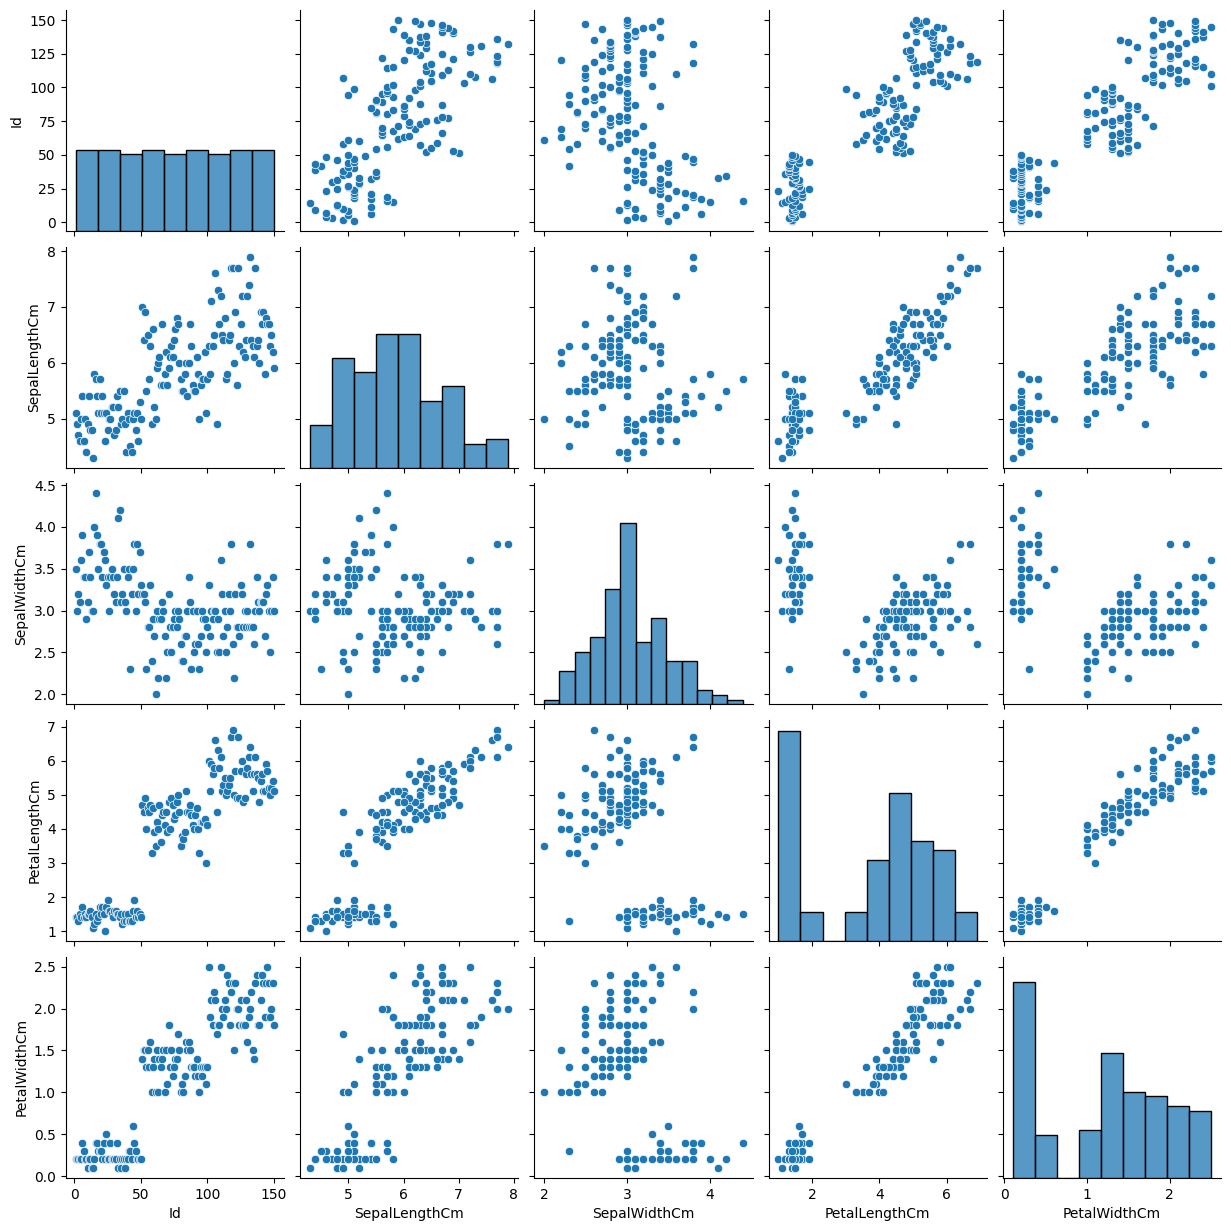

In [14]:
sns.pairplot(data=df)
plt.show()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

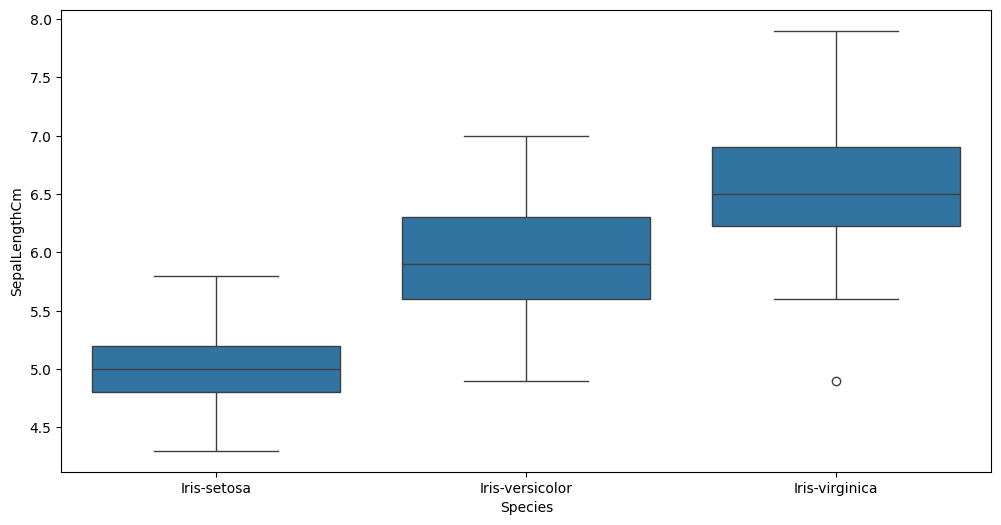

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

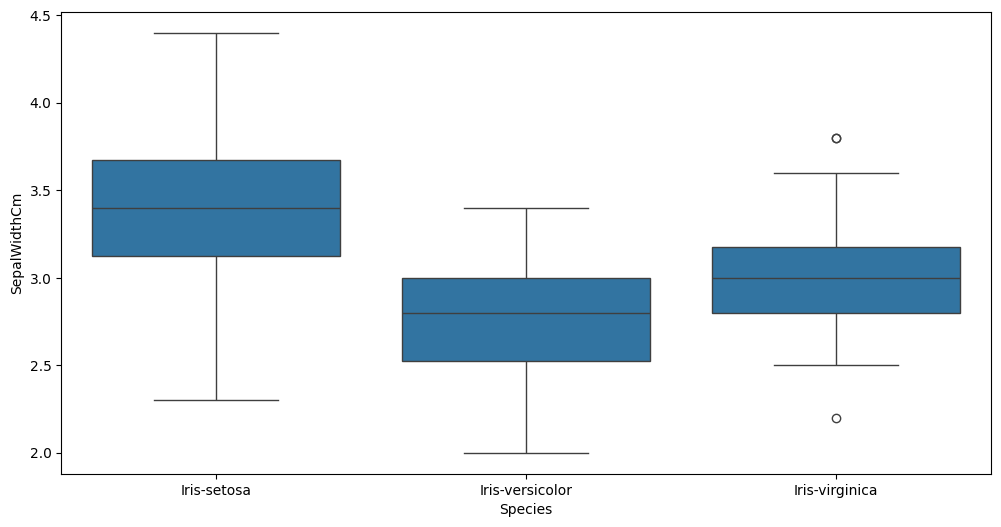

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Species",y="SepalWidthCm",data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

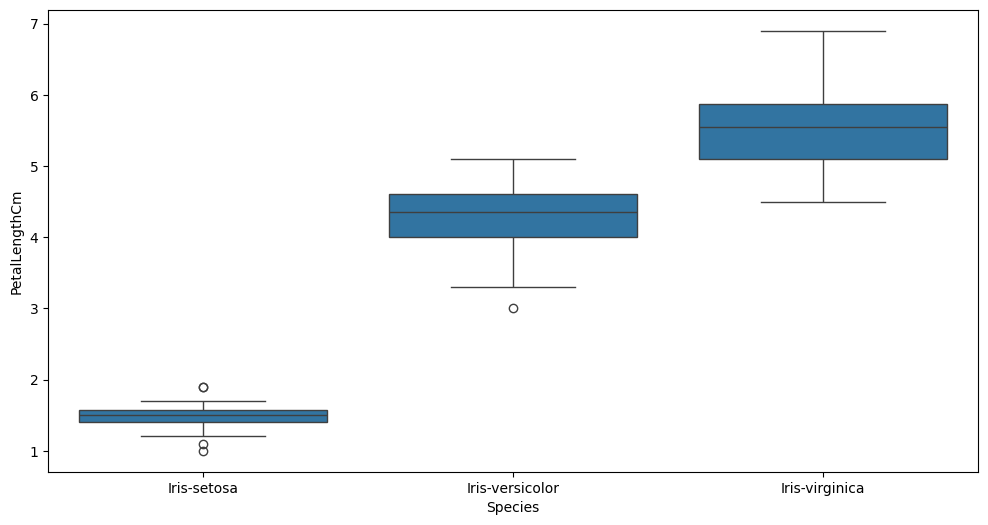

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Species",y="PetalLengthCm",data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

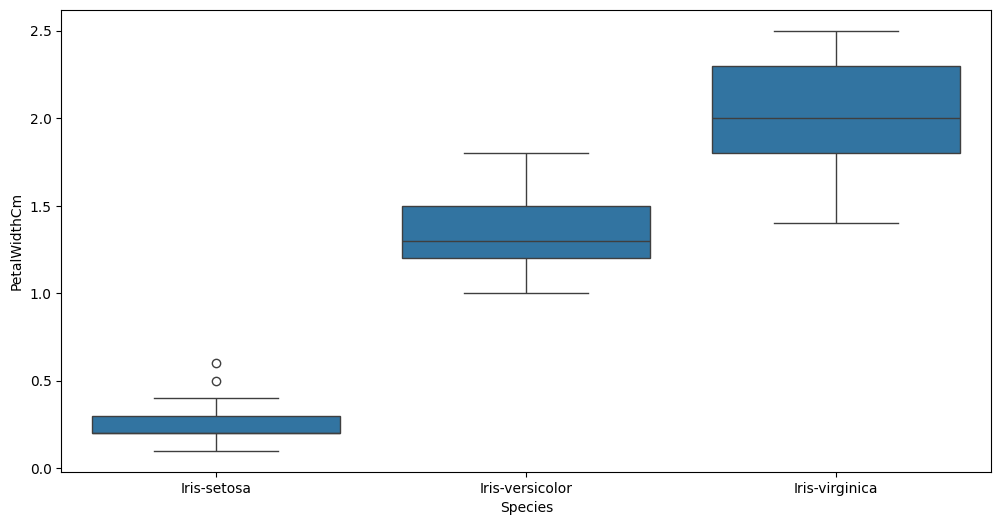

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

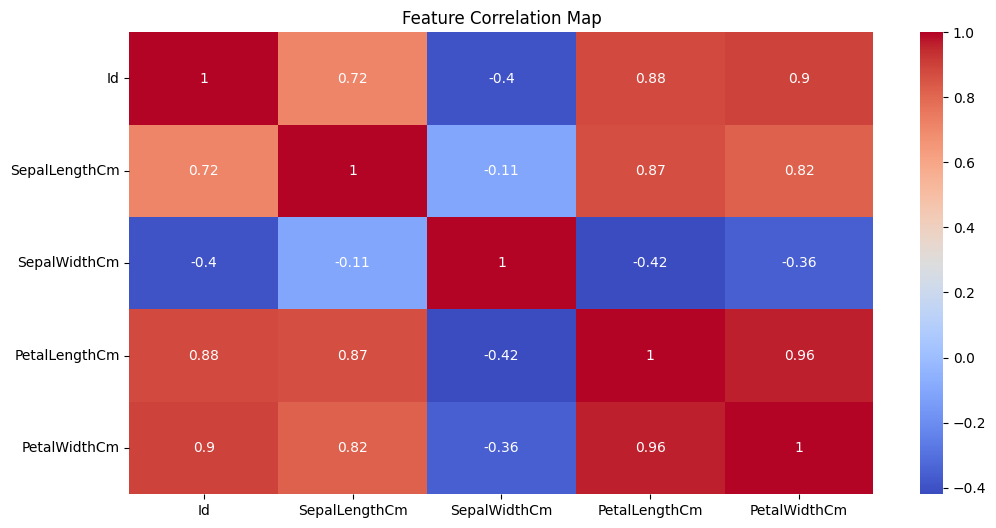

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop("Species",axis=1).corr(),cmap='coolwarm',annot=True)
plt.title("Feature Correlation Map")
plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

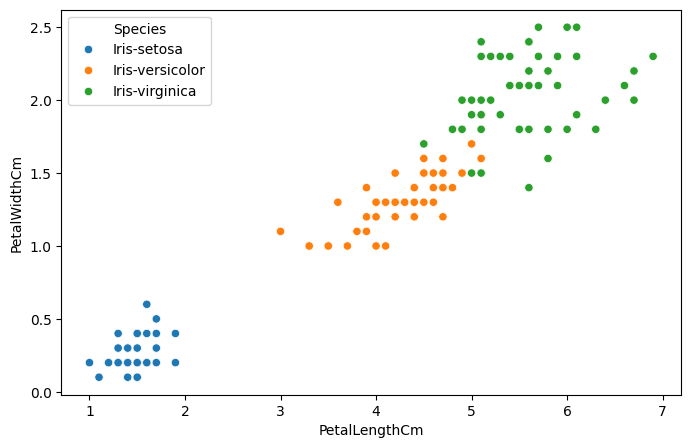

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

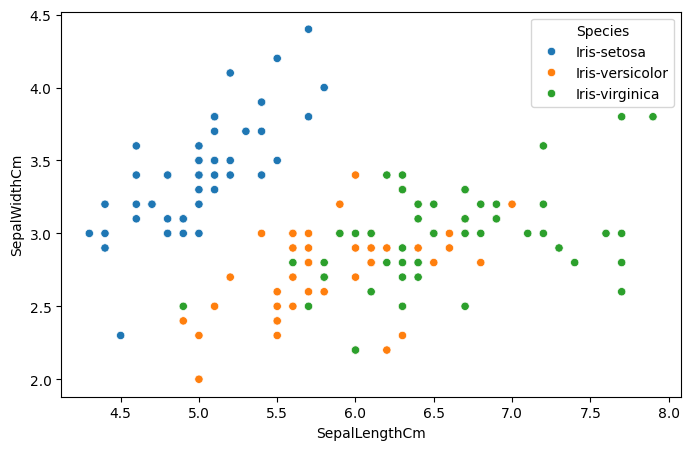

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)

In [22]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### LOGISTICS REGRESSION ###

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [24]:
x=df.drop(columns=["Id","Species"])
y=df["Species"]

In [25]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [32]:
lr=LogisticRegression()

In [33]:
lr

LogisticRegression()

In [34]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [37]:
y_pred_lr=lr.predict(x_test_scaled)

In [38]:
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [39]:
lr.score(x_test_scaled,y_test)

1.0

In [40]:
lr.score(x_test_scaled,y_pred_lr)

1.0

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc_lr=accuracy_score(y_pred_lr,y_test)
acc_lr

1.0

In [43]:
cr=classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

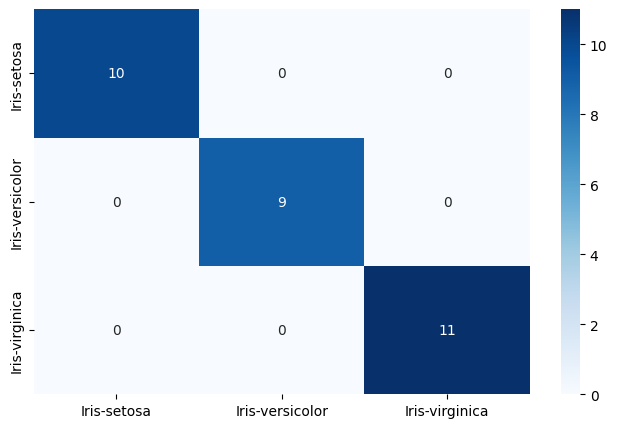

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',xticklabels=class_names,yticklabels=class_names)

### RANDOM FOREST CLASSIFIER ###

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier()

In [47]:
rf

RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [50]:
rf.score(x_test,y_pred_rf)

1.0

In [51]:
acc_rf=accuracy_score(y_pred_rf,y_test)
acc_rf

1.0

In [52]:
cr_rf=classification_report(y_test,y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0, 0.5, 'Feature')

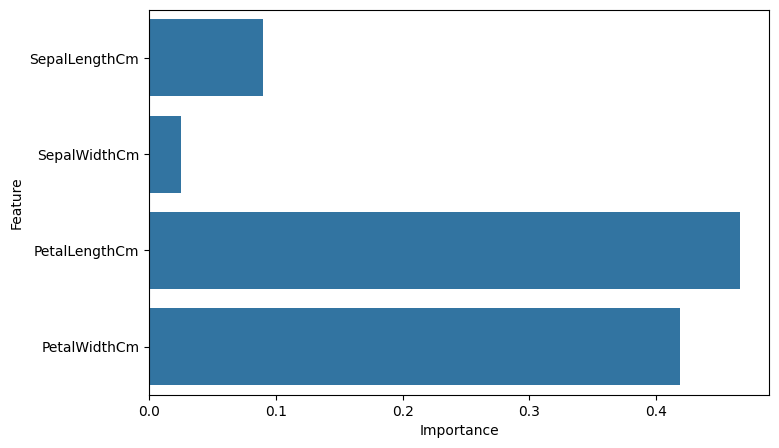

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
importances=rf.feature_importances_
feature_names=x_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")

### GRADIENT BOOSTING CLASSIFIER ###

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc=GradientBoostingClassifier(random_state=42)

In [59]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [62]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [63]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 120, dtype: int64

In [64]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [65]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Species, dtype: int64

In [66]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
ypred_gbc=gbc.predict(x_test)
ypred_gbc

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [68]:
acc_gbc=accuracy_score(y_test,ypred_gbc)
acc_gbc

1.0

In [69]:
cr_gbc=classification_report(y_test,ypred_gbc)
print(cr_gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix- Gradient Boosting Classifier')

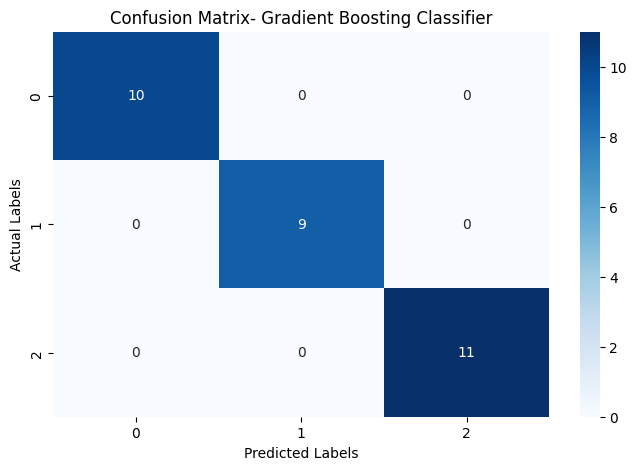

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_gbc=confusion_matrix(y_test,ypred_gbc)
cm_gbc
class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]
plt.figure(figsize=(8,5))
sns.heatmap(cm_gbc,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix- Gradient Boosting Classifier")

### SUPPORT VECTOR CLASSIFIER ###

In [71]:
from sklearn.svm import SVC

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [73]:
x=df.drop(columns=["Id","Species"])
y=df["Species"]

In [74]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [75]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [76]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 120, dtype: int64

In [77]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Species, dtype: int64

In [78]:
sv_model=SVC(kernel='rbf',random_state=42)

In [79]:
sv_model.fit(x_train_scaled,y_train)

SVC(random_state=42)

In [80]:
ypred_svc=sv_model.predict(x_test_scaled)
ypred_svc

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [81]:
acc_svc=accuracy_score(y_test,ypred_svc)
acc_svc

1.0

In [82]:
cr_svc=classification_report(y_test,ypred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix- Support Vector Classifier')

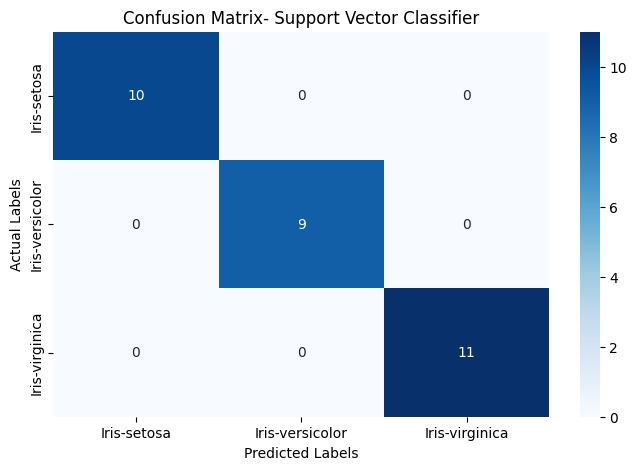

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_svc=confusion_matrix(y_test,ypred_svc)

class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]
plt.figure(figsize=(8,5))
sns.heatmap(cm_svc,annot=True, fmt='d', cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix- Support Vector Classifier")

### PERFORMANCE COMPARISON OF MODELS ###

In [84]:
final_results=pd.DataFrame({
    "Model":["Logistic Regresssion","Random Forest Classifier","Gradient Boosting Classifier","Support Vector Classifier"],
    "Accuracy":[acc_lr,acc_rf,acc_gbc,acc_svc]})

In [85]:
final_results

,Model,Accuracy
0,Logistic Regresssion,1.0
1,Random Forest Classifier,1.0
2,Gradient Boosting Classifier,1.0
3,Support Vector Classifier,1.0


C:\Users\majid\AppData\Local\Temp\ipykernel_4848\1108052134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model",y="Accuracy",data=final_results,palette="pastel")


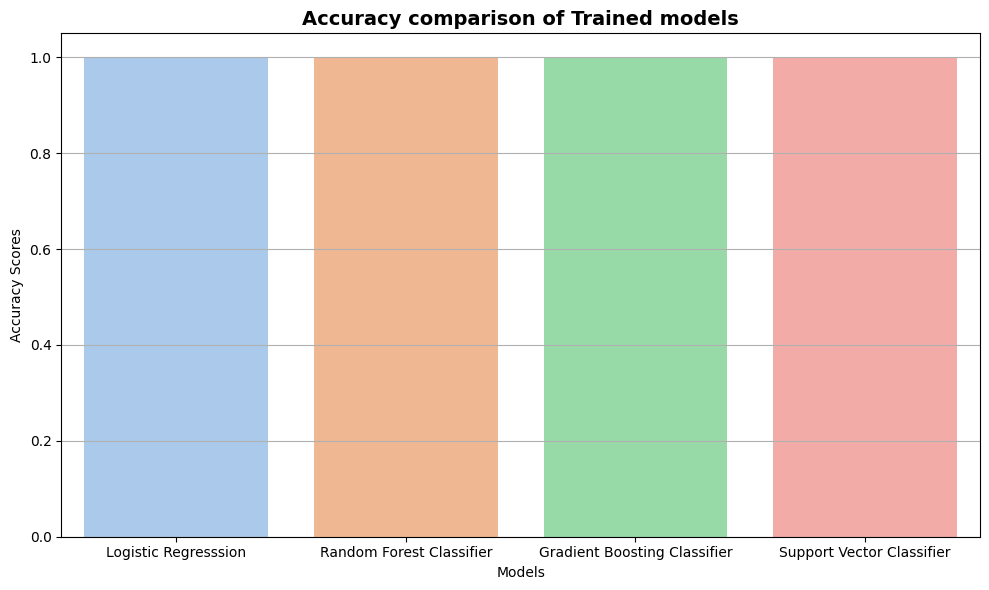

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="Accuracy",data=final_results,palette="pastel")
plt.title("Accuracy comparison of Trained models",fontsize=14,fontweight="bold")
plt.xlabel("Models",fontsize=10)
plt.ylabel("Accuracy Scores",fontsize=10)
plt.xticks(rotation=0)
plt.grid(True,axis='y')
plt.tight_layout()
plt.show()

### Conclusion :-  ##

##### In this Iris flower classification project, the goal was to categorize flowers into three species — Iris-setosa, Iris-versicolor, and Iris-virginicausing machine learning techniques. The dataset was explored visually and statistically to understand feature distributions, with Iris-setosa showing clear separation from the other classes

##### After preprocessing the data by handling labels and applying feature scaling where necessary, four models were trained and evaluated: Logistic Regression, SVM, Gradient Boosting, and Random Forest.

##### Among these, Random Forest Classifier delivered the most consistent and accurate results, achieving perfect training accuracy and ~96.7% test accuracy, with minimal signs of overfitting. In contrast, Logistic Regression and SVM underperformed, likely due to sensitivity to feature scaling and data separability.

##### Due to its strong performance, interpretability, and robustness, Random Forest was selected as the final model. It also provides insights into feature importance, making it a practical choice for real-world applications in botany and plant classification.

##### This project demonstrates that even simple models can perform exceptionally well when paired with proper data preparation and evaluation. Future improvements could include advanced tuning, cross-validation, or deployment on real-world data.